## Regrssion(휘귀)

y = ax + b 
y = target 
x = single featurn
a,b = parameters of model (학습하려는 매개변수)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
df = datasets.load_boston()

In [3]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = boston.values
y = df.target

In [5]:
X_rooms = X[:,5]

In [6]:
y = y.reshape(-1 ,1)
X_rooms = X_rooms.reshape(-1 , 1)

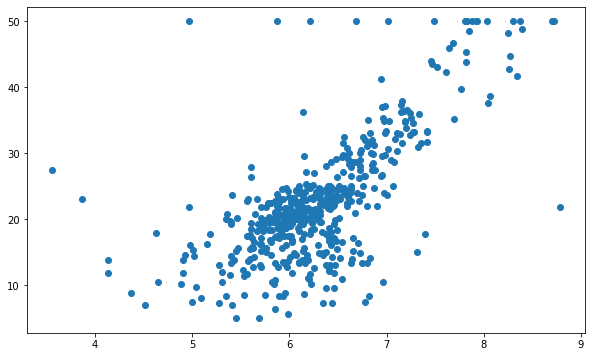

In [7]:
plt.scatter(X_rooms , y)
plt.show()

In [8]:
from sklearn.linear_model  import LinearRegression

reg = LinearRegression()

In [9]:
reg.fit(X_rooms ,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
pred_s = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

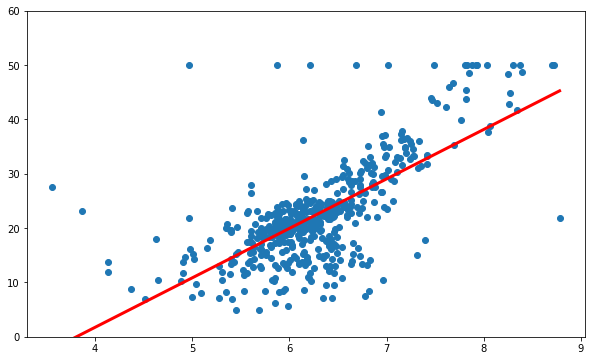

In [11]:
plt.scatter(X_rooms , y )
plt.plot(pred_s , reg.predict(pred_s), color = 'r' , linewidth = 3 )
plt.ylim(0, 60)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.3 , random_state =123)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [13]:
# 선형회귀의 기본 성능평사는 R2(결정계수)
reg.score(X_test, y_test)

0.6485645742370703

In [14]:
from sklearn.metrics import mean_squared_error

print('Root Mean Squared Error : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Root Mean Squared Error : 5.329714327288869


### Cross-validation

R2 값은 데이터를 분할하는 방식에 따라 달라짐 본질적으로 임의 분할에 대한 의존성을 방지하기 위해서 교차검증 사용  
데이터 세트를 5개의 그룹으로 분할하여 시작 , 첫 번째를 테스트셋으로 유지, 모델을 나머지 4개를 통해 테스트셋에서 예측하고 메트릭을 계산 
이번에는 2번째를 테스트셋으로 유지하고 나머지를 테스트셋 예측하고 메트릭 계산 이 과정을 5번 하게됨 
결과적으로 5개의 R2 값을 얻게 된다.

데이터 세트를 5개로 분할 하는 프로세스를 5folds CV ,10개로 분할 시 10folds CV , kfolds CV
더 많은 fold를 사용하면 계산 비용이 많이 소요 but 선택한 측정항목이 trainset 분할에 의존하는 문제를 방지 

In [15]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_results = cross_val_score(reg , X, y, cv = 5)
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [16]:
np.mean(cv_results).round(2)

0.35

In [17]:
cv_results_3 = cross_val_score(reg , X, y, cv = 3)
cv_results_10 = cross_val_score(reg , X, y, cv = 10)

print(np.mean(cv_results_3).round(2))
print(np.mean(cv_results_10).round(2))

-1.58
0.2


### Regularized regression
선형회귀를 fiting한다는 것은 손실함수를 사용하여 각 feature 변수에 대한 계수 ai를 선택 이러한 계수 또는 매개 변수를 크게 허용하면 과적합이 일어날 수 있다. 손실함수를 변경하여 큰 계수에 대한 패널티를 부여 이를 정규화라고 한다.

#### Ridge regression(능선회귀)

In [19]:
from sklearn.linear_model import Ridge

X_train, X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.3 , random_state =123)
ridge = Ridge(alpha = 0.1 ,normalize = True)
ridge.fit(X_train , y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test , y_test)

0.6395075695364151

In [22]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge =Ridge(normalize  =True)


for alpha in alpha_space:

    ridge.alpha = alpha
    
    ridge_cv_scores = cross_val_score(ridge , X ,y ,cv = 10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)

NameError: name 'display_plot' is not defined

#### Lasso regression(올가미회귀)

In [20]:
from sklearn.linear_model import Lasso

X_train, X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.3 , random_state =123)
lasso = Lasso(alpha = 0.1 , normalize = True)
lasso.fit(X_train , y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test , y_test)

0.5333523023068352

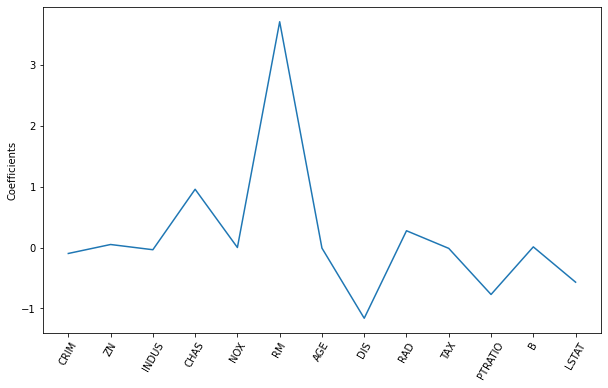

In [21]:
# 데이터세트의 feature importance를 선택하는데 사용가능 , 덜 중요한 특성의 계수를 정확히 0으로 축소하는 경향이 있기 때문

names = boston.columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)) , lasso_coef)
_ = plt.xticks(range(len(names)), names , rotation = 60)
_ = plt.ylabel("Coefficients")
plt.show()